In [1]:
# mounting drive. Remove when testing/running locally
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1/

Mounted at /content/drive/
/content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1


# 1. Stochastic Gradient Descent

## Problem A
Linear regression learns from a model of the form:
$$ f(x_1, x_2, ... , x_d) = \left(\sum_{i=1}^d w_i x_i \right) + b$$

This can be rewritten as $ f(x_1, x_2, ... , x_d) \textbf{w}^\text{T}\textbf{x}$ for vectors $\textbf{w}$ and  $\textbf{x}$ where the bias term $b$ is included by rewritting:
$$ \textbf{w} = [b, w_1, w_2, ..., w_d]^\text{T}$$
$$ \textbf{x} = [1, x_1, x_2, ..., x_d]^\text{T}$$
Thus:
$$ f(x_1, x_2,...,x_d) = \textbf{w}^\text{T}\textbf{x} = b + ∑_{i=1}^Nw_ix_i$$
## Problem B
The loss function $L$ is
$$L(f) = \sum_{i=1}^N(y_i -  \textbf{w}^\text{T}\textbf{x}_i)^2$$

The gradient is found using the chain rule:

$$ \frac{\partial L}{\partial  \textbf{w}} = 2 \sum_{i=1}^N \left[(y_i - \textbf{w}^\text{T}\textbf{x}_i)\cdot \left( -\textbf{x}_i\right)\right] =  2 \sum_{i=1}^N(\textbf{w}^\text{T}\textbf{x}_i-y_i)\textbf{x}_i$$

## Problem C-E: Stochasitc Gradient Descent Visualization


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from sgd_helper import (
    generate_dataset1,
    generate_dataset2,
    plot_dataset,
    plot_loss_function,
    animate_convergence,
    animate_sgd_suite,
)

### Problem 1C: Implementation of SGD
Fill in the loss, gradient, and SGD functions according to the guidelines given in the problem statement in order to perform SGD.

In [7]:
def loss(X, Y, w):
  """
  Calculate the squared loss function.

  Inputs:
      X: A (N, D) shaped numpy array containing the data points.
      Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
      w: A (D, ) shaped numpy array containing the weight vector.

  Outputs:
      The loss evaluated with respect to X, Y, and w.
  """

  return np.sum((Y - np.matmul(X, w)) ** 2)


def gradient(x, y, w):
  """
  Calculate the gradient of the loss function with respect to
  a single point (x, y), and using weight vector w.

  Inputs:
      x: A (D, ) shaped numpy array containing a single data point.
      y: The float label for the data point.
      w: A (D, ) shaped numpy array containing the weight vector.

  Output:
      The gradient of the loss with respect to x, y, and w.
  """
  return 2 * (np.matmul(x, w) - y) * x


def SGD(X, Y, w_start, eta, N_epochs):
  """
  Perform SGD using dataset (X, Y), initial weight vector w_start,
  learning rate eta, and N_epochs epochs.

  Inputs:
      X: A (N, D) shaped numpy array containing the data points.
      Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
      w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
      eta: The step size.
      N_epochs: The number of epochs (iterations) to run SGD.

  Outputs:
      W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
      losses: A (N_epochs, ) shaped array containing the losses from all iterations.
  """
  N, D = X.shape
  W = np.zeros((N_epochs, D))
  losses = np.zeros(N_epochs)

  # W[0] = w_start
  # losses[0] = loss(X, Y, w_start)
  w = w_start
  for epoch in range(N_epochs):
    for j in range(N):
      w -= eta * gradient(X[j], Y[j], w)
    # updating only after the epoch is over
    W[epoch] = w
    losses[epoch] = loss(X, Y, w)
  return W, losses


### Problem 1D: Visualization
#### Dataset
We'll start off by generating two simple 2-dimensional datasets. For simplicity, we do not consider separate training and test sets.

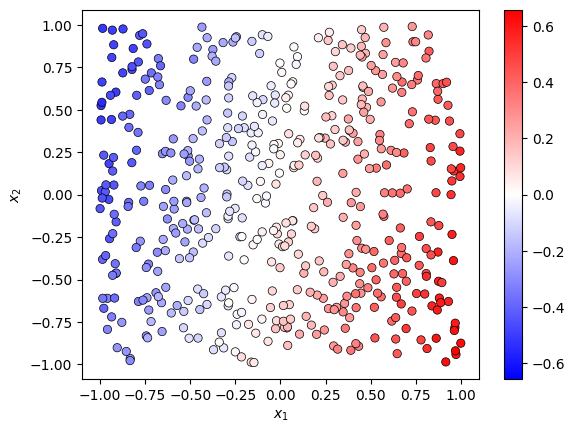

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x_1$', ylabel='$x_2$'>)

In [4]:
X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)

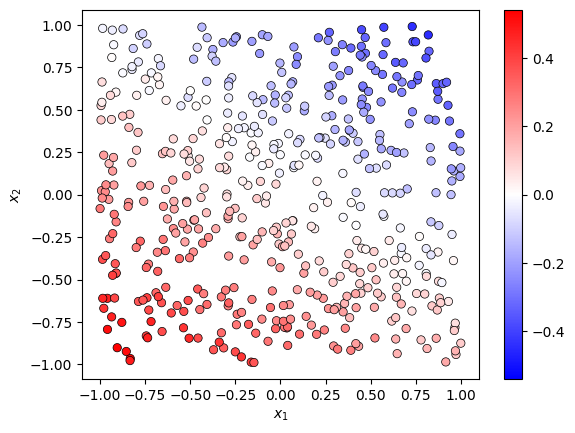

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x_1$', ylabel='$x_2$'>)

In [5]:
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

#### SGD from a single point
First, let's visualize SGD from a single starting point:


Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1e-05} ...



Animating...


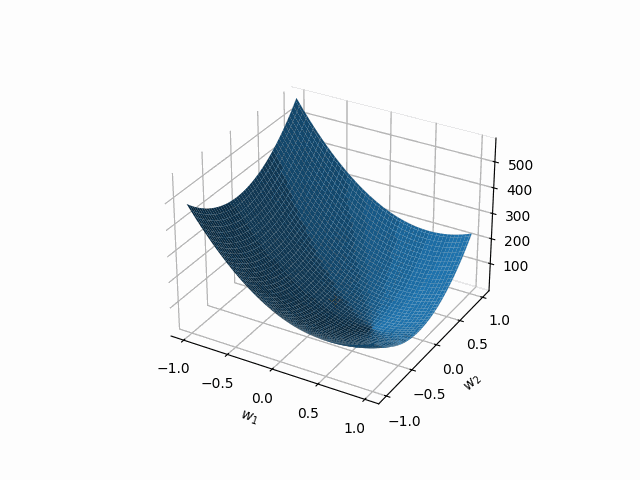

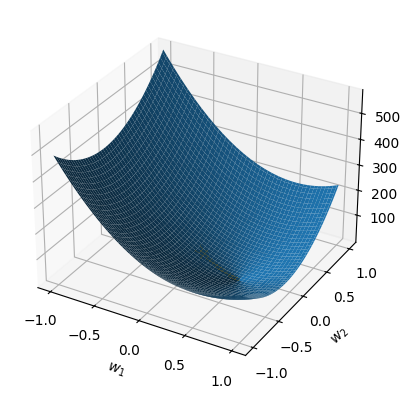

In [8]:
# Parameters to feed the SGD.
# <FR> changes the animation speed.
params = ({"w_start": [0.01, 0.01], "eta": 0.00001},)
N_epochs = 1000
FR = 20

# Let's animate it!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save("animation1.gif", fps=30, writer="imagemagick")
Image(open("animation1.gif", "rb").read())

Let's view how the weights change as the algorithm converges:


Animating...


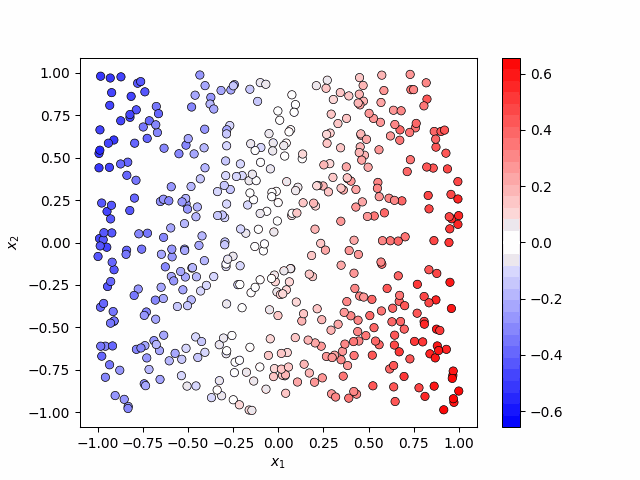

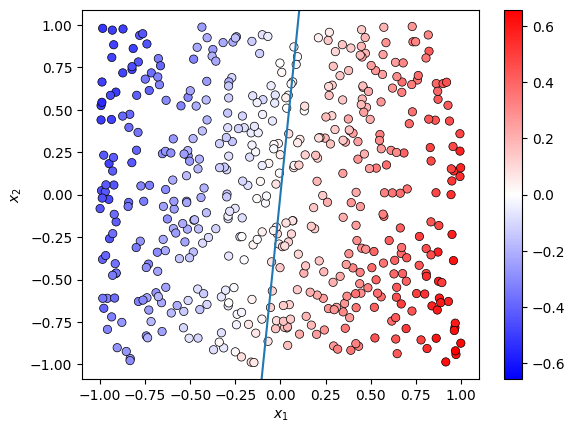

In [9]:
# Parameters to feed the SGD.
params = ({"w_start": [0.01, 0.01], "eta": 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]["w_start"], params[0]["eta"], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
anim.save("animation2.gif", fps=30, writer="imagemagick")
Image(open("animation2.gif", "rb").read())

#### SGD from multiple points
Now let's visualize SGD from multiple arbitrary starting points

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...



Animating...


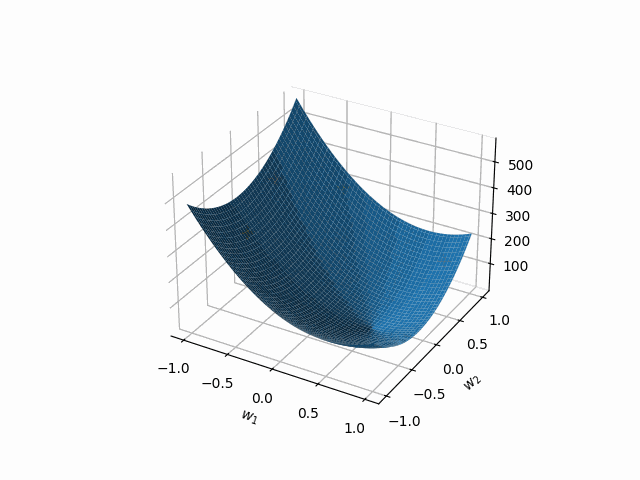

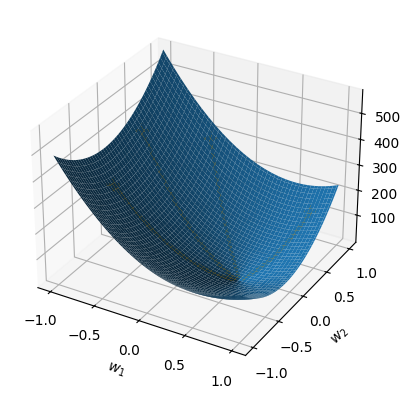

In [10]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {"w_start": [-0.8, -0.3], "eta": 0.00001},
    {"w_start": [-0.9, 0.4], "eta": 0.00001},
    {"w_start": [-0.4, 0.9], "eta": 0.00001},
    {"w_start": [0.8, 0.8], "eta": 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save("animation3.gif", fps=30, writer="imagemagick")
Image(open("animation3.gif", "rb").read())

Let's do the same thing but with a different dataset:

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...



Animating...


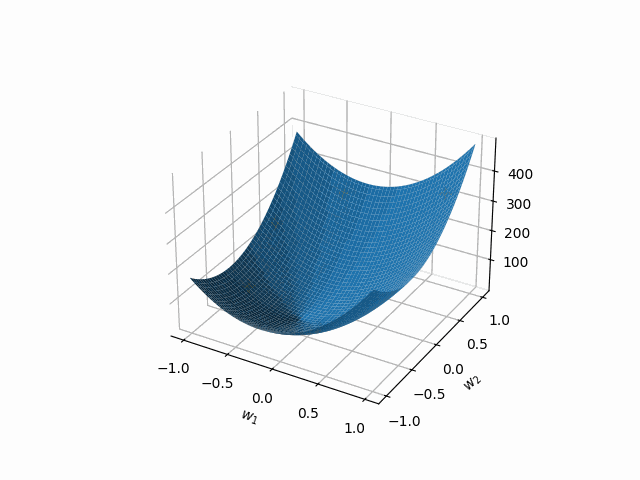

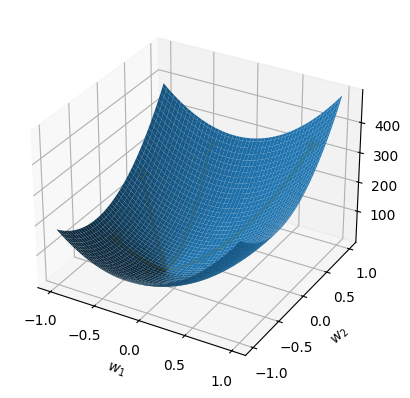

In [11]:
# Parameters to feed the SGD.
params = (
    {"w_start": [-0.8, -0.3], "eta": 0.00001},
    {"w_start": [-0.9, 0.4], "eta": 0.00001},
    {"w_start": [-0.4, 0.9], "eta": 0.00001},
    {"w_start": [0.8, 0.8], "eta": 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
anim.save("animation4.gif", fps=30, writer="imagemagick")
Image(open("animation4.gif", "rb").read())


We note that the convergence depends heavily on the starting point. Mainly, if the starting point is significantly far from the global minimum, then the fit will not converge. This is the case for both data sets.

### Problem 1E: SGD with different ste sizes

Now, let's visualize SGD with different step sizes (eta):

(For ease of visualization: the trajectories are ordered from left to right by increasing eta value. Also, note that we use smaller values of `N_epochs` and `FR` here for easier visualization.)

Performing SGD with parameters {'w_start': [0.7, 0.8], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.2, 0.8], 'eta': 5e-05} ...
Performing SGD with parameters {'w_start': [-0.2, 0.7], 'eta': 0.0001} ...
Performing SGD with parameters {'w_start': [-0.6, 0.6], 'eta': 0.0002} ...



Animating...


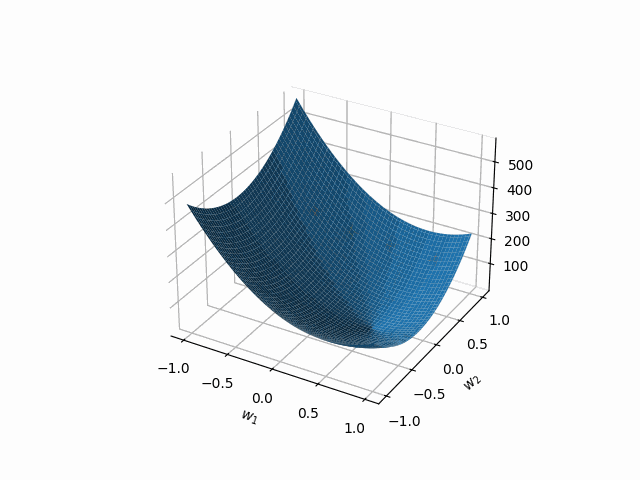

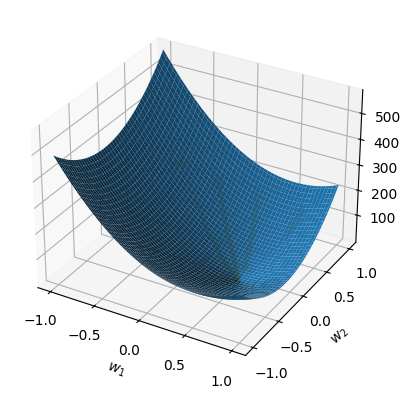

In [12]:
# Parameters to feed the SGD.
params = (
    {"w_start": [0.7, 0.8], "eta": 0.00001},
    {"w_start": [0.2, 0.8], "eta": 0.00005},
    {"w_start": [-0.2, 0.7], "eta": 0.0001},
    {"w_start": [-0.6, 0.6], "eta": 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save("animation5.gif", fps=30, writer="imagemagick")
Image(open("animation5.gif", "rb").read())

#### Plotting SGD Convergence
Let's visualize the difference in convergence rates a different way. Plot the loss with respect to epoch (iteration) number for each value of eta on the same graph.

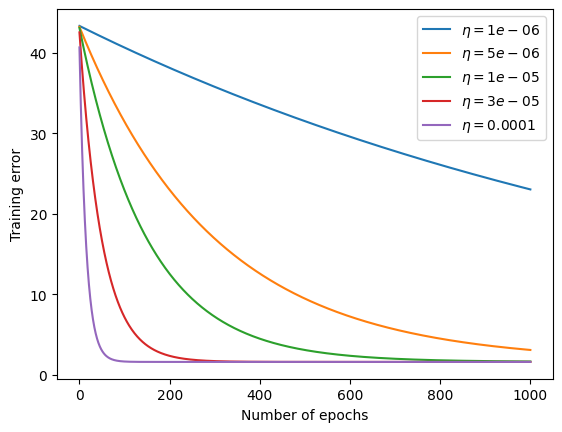

In [13]:


"""Plotting SGD convergence"""
eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

x = np.linspace(0, N_epochs, N_epochs)
for eta in eta_vals:
  _, losses = SGD(X1, Y1, w_start, eta, N_epochs)

  plt.plot(x, losses, label = f"$\eta = {eta}$")

plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.legend()
plt.show()

We see as $\eta$ approaches $10^{-4}$ The training error decreases at a much faster rate and converges in fewer epochs. This is as the other values are too small, leading to too small jumps to converge in the same number of epochs.